In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, mean_squared_error as MSE


### 1.	What is a neural network? What are the general steps required to build a neural network? 

#### Neural network is a network that reflect behaviour of human brain to solve problem. In other words, it mimic behavior of human brain allowing computer programs to recognize patterns and solve the problem in the field of machine learning, AI and deep learning. Neural network contains nodes which are also called neurons (just like human neuron cell). Neural networks are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node connects to another and has associated weights and threshold. 

#### Neural Networks consist of three main parts: the input layer, the hidden layer, and the output layer. If we have multiple hidden layer then our network is also called deep learning network. Multiple hidden layers are necessary when we are trying to make any complex predictions. In order to build neural network we first need dataset. Once we have dataset then we can decide architecture of our neural network. Some of the aspects of neural network architecture is as below.

#### Number of input nodes: The way to identify number of input nodes is identify the number of features.
#### Number of hidden layers: The default is to use the single or one hidden layer. But we can use multiple hidden layers for complex dataset. 
#### Number of nodes in each of the hidden layers: In case of using multiple hidden layers, the best practice is to use same number of nodes in each hidden layer. In general practice, the number of hidden units is taken as comparable number to that of number of input nodes. That means one could take either the same number of hidden nodes as input nodes or maybe twice or thrice the number of input nodes.
#### Number of output nodes: The way to identify number of output nodes is to identify the number of output classes you want the neural network to process.

#### Once we have architecture in place then we need to implement forward propogation, activation function and backward propogation. In forward propagation, we apply a set of weights to the input data and calculate an output. For the first forward propagation, the set of weights is selected randomly. In back propagation, we measure the margin of error of the output and adjust the weights accordingly to decrease the error. It is the method of fine-tuning the weights of a neural network based on the error rate obtained in the previous epoch (i.e., iteration). Proper tuning of the weights allows you to reduce error rates and make the model reliable by increasing its generalization. Activation functions define one by one at layers. 



### 2.	Generally, how do you check the performance of a neural network? Why? 

For a classifier Neural Network, the metrics tend to be ‘Accuracy’, ‘Loss’ and so on. 

For a Regression Neural Network, the metrics are ‘Correlation Factor’, ‘Loss’, ‘Binary_Cross_Entropy’ and so on.

With using these performance check we can check how far the predictions of our neural network is from actual result.

### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [688]:
df = pd.read_csv('../abalone_data.csv')
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [690]:
#nominal values
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

df['Sex']=class_labels.fit_transform(df['Sex'].values)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [691]:
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [692]:
df2 = df[(df['Rings'] < 21) & (df['Rings']>3)]
df2

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [693]:
df2['Rings'].value_counts().sort_index()

4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
Name: Rings, dtype: int64

In [694]:
#feature selection
from sklearn.feature_selection import RFE

X = df2.drop('Rings',axis=1)
y = df2['Rings']

reg = LinearRegression()
rfe = RFE(reg,n_features_to_select=6)
rfe_ = rfe.fit(X, y)

print(X.columns)
print(rfe_.support_)
print(rfe.ranking_)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')
[False False  True  True  True  True  True  True]
[3 2 1 1 1 1 1 1]


In [695]:
#df2 = df2.drop(['Sex'],axis=1)

df2

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:>

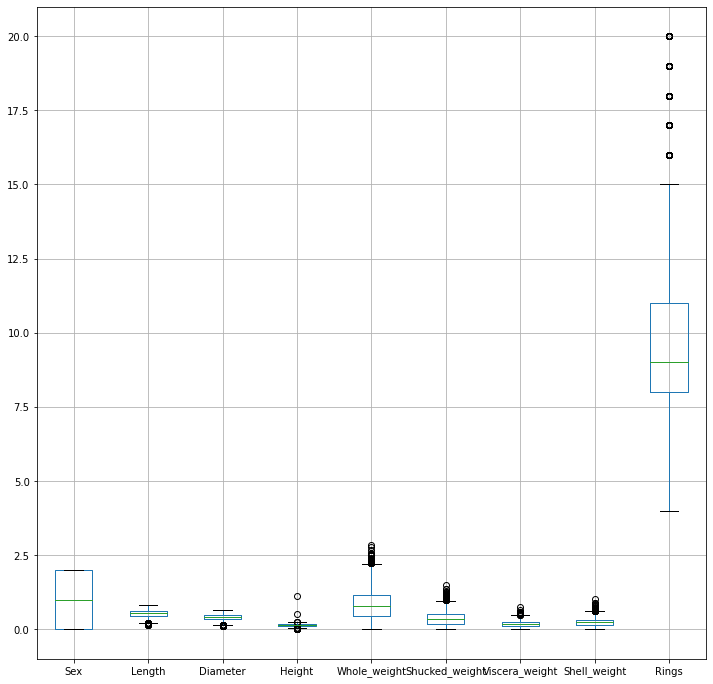

In [696]:
df2.boxplot(figsize=(12,12))

In [697]:
# Replacing outliers with nulls in all the feature columns

for x in ['Length','Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight','Shell_weight']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

c:\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [698]:
df2.isnull().sum()

Sex                0
Length            36
Diameter          44
Height            21
Whole_weight      29
Shucked_weight    48
Viscera_weight    27
Shell_weight      40
Rings              0
dtype: int64

In [699]:
# Droping all null values from Dataframe
df2 = df2.dropna(axis=0)

In [700]:
# Dataframe after removing null values
df2

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [701]:
df2.var()

Sex               0.675524
Length            0.012215
Diameter          0.008412
Height            0.001262
Whole_weight      0.198941
Shucked_weight    0.040655
Viscera_weight    0.010246
Shell_weight      0.015715
Rings             8.504708
dtype: float64

In [702]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3986 non-null   int32  
 1   Length          3986 non-null   float64
 2   Diameter        3986 non-null   float64
 3   Height          3986 non-null   float64
 4   Whole_weight    3986 non-null   float64
 5   Shucked_weight  3986 non-null   float64
 6   Viscera_weight  3986 non-null   float64
 7   Shell_weight    3986 non-null   float64
 8   Rings           3986 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 295.8 KB


In [703]:
df2 = df2.astype({'Sex': np.float,'Rings':np.float})


In [704]:
df2

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [414]:
#Standardised the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df3 = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)

In [415]:
df3

,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.468376,-1.235495,-0.659898,-0.627562,-0.748918,-0.659129,1.765316
1,-1.558061,-1.376163,-1.306675,-1.247476,-1.267568,-1.297234,-0.976949
2,0.130951,-0.110157,-0.294474,-0.468864,-0.348816,-0.180550,-0.291383
3,-0.468376,-0.391491,-0.655414,-0.672196,-0.620490,-0.619247,0.051400
4,-1.667030,-1.657497,-1.352633,-1.297069,-1.356479,-1.416878,-0.976949
...,...,...,...,...,...,...,...
3983,0.457856,0.733848,0.176316,0.094018,0.614391,0.130526,0.394184
3984,0.348888,-0.110157,0.353423,0.436211,0.372354,0.222254,0.051400
3985,0.730278,1.859186,0.824214,0.865191,1.093525,0.601129,-0.291383
3986,0.839246,0.311846,0.641503,0.892467,0.831730,0.505413,0.051400


In [416]:
df3['Rings'].value_counts().sort_index()

-2.005299     30
-1.662516    101
-1.319733    255
-0.976949    391
-0.634166    566
-0.291383    685
 0.051400    623
 0.394184    468
 0.736967    246
 1.079750    195
 1.422533    118
 1.765316    102
 2.108100     61
 2.450883     52
 2.793666     39
 3.136449     32
 3.479232     24
Name: Rings, dtype: int64

In [705]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [706]:
X = df2.drop('Rings',axis=1)
y = df2['Rings']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=42)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [711]:
n_cols = X.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(300, activation='relu', input_shape=(n_cols,)))

# Adding layers
model.add(Dense(300, activation='relu'))

model.add(Dense(300, activation='relu'))

model.add(Dense(300, activation='relu'))

model.add(Dense(300, activation='relu'))

model.add(Dense(300,activation='relu'))

model.add(Dense(300,activation='relu'))

# Add the output layer
model.add(Dense(1))

In [712]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
 
# Fit the model
model.fit(X_train,y_train,validation_split=0.3)

70/70 [==============================] - 1s 9ms/step - loss: 36.7400 - val_loss: 5.9263


In [713]:
history = model.fit(X_train, y_train, epochs=40,callbacks=[early_stopping_monitor])

Epoch 1/40
100/100 [==============================] - 0s 4ms/step - loss: 5.3323
Epoch 2/40
100/100 [==============================] - 0s 5ms/step - loss: 5.2303
Epoch 3/40
100/100 [==============================] - 0s 5ms/step - loss: 4.3736
Epoch 4/40
100/100 [==============================] - 0s 5ms/step - loss: 4.2077
Epoch 5/40
100/100 [==============================] - 0s 4ms/step - loss: 4.3068
Epoch 6/40
100/100 [==============================] - 0s 5ms/step - loss: 4.0287
Epoch 7/40
100/100 [==============================] - 0s 5ms/step - loss: 4.4483
Epoch 8/40
100/100 [==============================] - 0s 5ms/step - loss: 4.0651A: 0s - loss: 4.0
Epoch 9/40
100/100 [==============================] - 0s 5ms/step - loss: 4.1883
Epoch 10/40
100/100 [==============================] - 1s 6ms/step - loss: 3.8112
Epoch 11/40
100/100 [==============================] - 0s 5ms/step - loss: 4.0858
Epoch 12/40
100/100 [==============================] - 0s 5ms/step - loss: 4.1115
Epoch 13

In [714]:
rmse = (3.2192)**(1/2)
print(rmse)

1.7942129193604643


### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

In [715]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 


rmse_val = [] #to store rmse values for different k

for K in range(30):
    
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_test) #make prediction on test set
    error = (mean_squared_error(y_test,y_pred)**(1/2)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 2.798137583257316
RMSE value for k=  2 is: 2.3751401488790176
RMSE value for k=  3 is: 2.273520278855709
RMSE value for k=  4 is: 2.152892645222849
RMSE value for k=  5 is: 2.1193936807339115
RMSE value for k=  6 is: 2.120762356162798
RMSE value for k=  7 is: 2.1114296421507275
RMSE value for k=  8 is: 2.104049569932189
RMSE value for k=  9 is: 2.117181177970104
RMSE value for k=  10 is: 2.1271959021244466
RMSE value for k=  11 is: 2.117907460643123
RMSE value for k=  12 is: 2.1136433390845735
RMSE value for k=  13 is: 2.117179426823269
RMSE value for k=  14 is: 2.106375818446858
RMSE value for k=  15 is: 2.1030060303496505
RMSE value for k=  16 is: 2.0940135855106714
RMSE value for k=  17 is: 2.0861271603441582
RMSE value for k=  18 is: 2.085270147690381
RMSE value for k=  19 is: 2.0856484682164704
RMSE value for k=  20 is: 2.0870430630121573
RMSE value for k=  21 is: 2.0868242622348543
RMSE value for k=  22 is: 2.0864055931818597
RMSE value for k=  23 is: 2.0

In [716]:
# From above for loop we can see k = 18 is best for this model
KNN_model = neighbors.KNeighborsRegressor(n_neighbors = 18)

In [717]:
X = df2.drop('Rings',axis=1)
y = df2['Rings']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify=y, random_state=42)

KNN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=18)

In [718]:
y_pred = KNN_model.predict(X_test)
print(y_pred)

error = mean_squared_error(y_test,y_pred)

[12.5        10.94444444 10.77777778 ...  6.22222222  6.77777778
  8.77777778]


In [719]:
print ("The RMSE is:",format(error**(1/2)))

The RMSE is: 2.089140302872671


### 5.	Create a neural network using pytorch to predict the same result as question 3. 

In [720]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X = df2.drop('Rings',axis=1).values
y = df2['Rings'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=42)

In [721]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#y_train = y_train.view(-1,1)
#y_test = y_test.view(-1,1)

print(X_train)

tensor([[1.0000, 0.4300, 0.3200,  ..., 0.1635, 0.0800, 0.0900],
        [2.0000, 0.3100, 0.2250,  ..., 0.0540, 0.0240, 0.0500],
        [2.0000, 0.6000, 0.4750,  ..., 0.5490, 0.2875, 0.3600],
        ...,
        [1.0000, 0.3350, 0.2600,  ..., 0.0970, 0.0300, 0.0540],
        [1.0000, 0.5350, 0.4200,  ..., 0.3980, 0.1965, 0.2500],
        [0.0000, 0.5850, 0.4200,  ..., 0.4420, 0.2155, 0.2875]])


In [722]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=300, hidden2=300, hidden3=300,hidden4=300, hidden5=300, hidden6=300,
                 hidden7=300, out_feature =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.layer_3_connection = nn.Linear(hidden2, hidden3)
        self.layer_4_connection = nn.Linear(hidden3, hidden4)
        self.layer_5_connection = nn.Linear(hidden4, hidden5)
        self.layer_6_connection = nn.Linear(hidden5, hidden6)
        self.layer_7_connection = nn.Linear(hidden6, hidden7)
        self.out = nn.Linear(hidden7, out_feature)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = F.relu(self.layer_3_connection(x))
        x = F.relu(self.layer_4_connection(x))
        x = F.relu(self.layer_5_connection(x))
        x = F.relu(self.layer_6_connection(x))
        x = F.relu(self.layer_7_connection(x))
        x = self.out(x)
        return x

In [723]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

In [727]:
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [728]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 8.607023239135742
Epoch number: 11 with loss: 8.518616676330566
Epoch number: 21 with loss: 8.507890701293945
Epoch number: 31 with loss: 8.505471229553223
Epoch number: 41 with loss: 8.505746841430664
Epoch number: 51 with loss: 8.505614280700684
Epoch number: 61 with loss: 8.505510330200195
Epoch number: 71 with loss: 8.505477905273438
Epoch number: 81 with loss: 8.505468368530273
Epoch number: 91 with loss: 8.505465507507324
Epoch number: 101 with loss: 8.505463600158691
Epoch number: 111 with loss: 8.505461692810059
Epoch number: 121 with loss: 8.505461692810059
Epoch number: 131 with loss: 8.505461692810059
Epoch number: 141 with loss: 8.505461692810059
Epoch number: 151 with loss: 8.505461692810059
Epoch number: 161 with loss: 8.505461692810059
Epoch number: 171 with loss: 8.505461692810059
Epoch number: 181 with loss: 8.505461692810059
Epoch number: 191 with loss: 8.505461692810059
Epoch number: 201 with loss: 8.505461692810059
Epoch number: 211 with l

In [729]:
rmse = (8.505461692810059)**(1/2)
print(rmse)

2.916412469595146


### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

#### The performance of the keras model returns RMSE of 1.79. When we use KNN method on same dataset we got RMSE of 2.08 whereas using pytorch we got RMSE of 2.91.  

#### Keras model performed the best because it does have the lowest RMSE among the method we used. This is because we have tried different combination of hidden layers and also different number of nodes for each layers. We also tried different optimizer but we got best result with adam. KNN method got decent result but it was not any better than keras. In KNN we got the best KNN number but we can not define addition layers like in keras and this make this model less complex than keras model and thus we got better score on keras than KNN.

#### I was surprised with pytorch model because I was expecting the best result out of all models we used. But surprisingly, we got worse score on this model. I have tried to change hidden layers and nodes per layer and also tried changing optimizer (tried adam and sgd) but result was not getting any better than we got here. 
